<h1 style="text-align: center; font-size: 40px; color: gray; font-weight: 700; margin-bottom: 5px;">
    <b>FOUR-LEAF CLOVER TEAM</b>
</h1>

<h2 style="text-align: center; font-weight: 700; margin-top: 0;">
    <b>Use Case : DATA ADS provided by inSight Data</b>
</h2>

<h2 style="text-align: center; font-weight: 700; margin-top: 0;">
    <b>MARKETING PERFORMANCE ANALYSIS FOR DATA ANALYST PROJECT COMPETITION</b>
</h2>

<h3 style="text-align: center; font-weight: 700; margin-top: 0;">
    <b>Ajeng Aulia Salshabila</b>, <b>Grace Natalie Catherine</b>
</h3>

<hr style="

# **IMPORT LIBRARY**

In [1]:
# import libraries untuk data cleaning, manipulation and exploratory data analysis
import pandas as pd
import numpy as np

# import libraries untuk data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import libraries untuk uji statistik
from scipy.stats import shapiro # Uji Normalitas
from scipy.stats import mannwhitneyu, kruskal  # Non Parametrik
from scipy.stats import chi2_contingency # Uji Chi-Square

# fungsi untuk menampilkan semua kolom DataFrame saat membaca datasetnya di output
pd.set_option('display.max_columns', None)

# fungsi untuk ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **BUSINESS UNDERSTANDING**

Sebuah *digital marketing agency* mengelola data iklan dari berbagai platform seperti *Meta Ads, TikTok Ads, dan Google Ads*. Data yang dihasilkan sangat besar dan beragam, mencakup metrik seperti *impressions, clicks, link clicks, purchase, purchase value,* dan *amount spent*.

## **Problem Statement**

Sebagai Tim Data, berikut adalah beberapa pertanyaan analisis yang akan dijawab pada project ini:

**A. Performance Metrics Analysis**
1. Berapa nilai CTR *(Click-Through Rate)* secara keseluruhan?
2. Bagaimana performa CTR berdasarkan *campaign objective (Traffic vs Sales)*? 
3. Berapa total *Purchase Value* (Omzet) yang dihasilkan dari iklan? 
4. Berapa nilai ROAS *(Return on Advertising Spend)* secara keseluruhan?

**B. Trend & Time Series Analysis**
1. Bagaimana tren performa iklan dari waktu ke waktu? 
2. Pada periode atau bulan apa performa iklan mengalami peningkatan signifikan? 
3. Apakah terdapat pola musiman *(seasonality)* yang mempengaruhi omzet iklan? 

**C. Industry & Account Analysis**
1. Industri apa yang memiliki nilai rata-rata omzet tertinggi? 
2. Akun atau brand mana yang paling efektif menghasilkan *revenue*? 
3. Industri mana yang memiliki nilai ROAS tertinggi?

**D. Business Insight & Strategic Question**
> Berdasarkan data, strategi apa yang sebaiknya dilakukan jika perusahaan ingin meningkatkan profit dari iklan digital? 

## **Goals**

Tujuan dari analisis ini adalah:
- Mengevaluasi kinerja iklan digital berdasarkan CTR, CPC, omzet, dan ROAS.
- Menganalisis tren dan pola waktu untuk mengidentifikasi peningkatan performa dan seasonality.
- Mengidentifikasi industri dan akun paling profitable berdasarkan omzet dan ROAS.
- Memberikan insight dan rekomendasi strategis untuk optimasi dan peningkatan profit iklan.

In [2]:
df = pd.read_csv('Data Ads.csv')

df

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2023-12-31,Client D - Beauty,Sales,547111.5,151032.0,46618.5,71763.0,9906.0,496.5,1218.0,5797660.5,515062.5
4376,2023-12-31,Client E - FMCG,Traffic,1361877.0,722730.0,30322.5,39778.5,0.0,0.0,0.0,0.0,3888375.0
4377,2023-12-31,Client E - FMCG,Sales,1083837.0,148594.5,76465.5,45249.0,4192.5,1179.0,652.5,4263457.5,5211208.5
4378,2023-12-31,Client F - FMCG,Traffic,509106.0,180396.0,141784.5,10150.5,0.0,0.0,0.0,0.0,791860.5


# **DATA UNDERSTANDING**

| Kolom             | Deskripsi                         |
|-------------------|-----------------------------------|
| created_date      | Tanggal campaign                  |
| account_name      | Nama klien                        |
| campaign_objective| Objective campaign (Traffic/Sales)|
| impressions       | Jumlah tayangan iklan             |
| reach             | Jumlah user unik                  |
| clicks            | Total klik                        |
| link_clicks       | Klik ke website                   |
| content_views     | View konten                       |
| add_to_cart       | Jumlah add to cart                |
| purchase          | Jumlah transaksi                  |
| purchase_value    | Total revenue                     |
| amount_spent      | Total biaya iklan                 |


In [3]:
df.info()

print('Persentase Missing Values per Kolom:')
missing_percent = (df.isnull().mean() * 100).round(2)
display(missing_percent)

print(f'shape dataset: {df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   float64
 4   reach               4380 non-null   float64
 5   clicks              4380 non-null   float64
 6   link_clicks         4380 non-null   float64
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   float64
 9   purchase            4380 non-null   float64
 10  purchase_value      4380 non-null   float64
 11  amount_spent        4380 non-null   float64
dtypes: float64(9), object(3)
memory usage: 410.8+ KB
Persentase Missing Values per Kolom:


created_date          0.0
account_name          0.0
campaign_objective    0.0
impressions           0.0
reach                 0.0
clicks                0.0
link_clicks           0.0
content_views         0.0
add_to_cart           0.0
purchase              0.0
purchase_value        0.0
amount_spent          0.0
dtype: float64

shape dataset: (4380, 12)


created_date tipe datanya masih object sehingga akan diubah jadi data type datetime pada proses cleaning.

In [4]:
# Statistics Description

print('Numerical Features')
display(df.describe())
print('Categorical Features')
display(df.describe(include='object'))

Numerical Features


,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
count,4.380000e+03,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03,4.380000e+03
mean,6.509784e+05,319465.963721,64658.303105,32284.340525,3270.216758,329.622032,299.895434,2.385893e+06,2.957227e+06
std,3.561788e+05,177837.971292,35658.804018,17818.611700,4149.902583,416.383348,401.934926,3.200339e+06,1.858174e+06
min,1.003580e+05,50134.000000,10029.000000,5008.000000,0.000000,0.000000,0.000000,0.000000e+00,1.014850e+05
25%,3.682400e+05,178756.300000,36632.250000,17758.200000,0.000000,0.000000,0.000000,0.000000e+00,1.474532e+06
50%,6.193560e+05,305107.500000,61225.000000,30892.500000,505.000000,50.000000,5.000000,5.176000e+04,2.856742e+06
75%,8.774980e+05,428148.125000,86084.450000,43292.750000,6296.150000,630.000000,560.250000,4.531508e+06,4.153663e+06
max,1.998018e+06,998320.000000,199252.000000,99554.000000,19964.000000,1992.000000,1980.000000,1.590125e+07,9.970642e+06


Categorical Features


,created_date,account_name,campaign_objective
count,4380,4380,4380
unique,365,6,2
top,2023-01-01,Client A - Fashion,Traffic
freq,12,730,2190


In [5]:
# Detail info of every variables

list_item = []

for col in df.columns:
    list_item.append([
        col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum() / len(df[col])) * 100, 2),df[col].nunique(), list(df[col].drop_duplicates().values)
    ])

df_desc = pd.DataFrame(
    columns=['data features', 'data type', 'null', 'null pct', 'unique', 'unique values'],
    data=list_item
)

df_desc


,data features,data type,null,null pct,unique,unique values
0,created_date,object,0,0.0,365,"[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0..."
1,account_name,object,0,0.0,6,"[Client A - Fashion, Client B - Beauty, Client..."
2,campaign_objective,object,0,0.0,2,"[Traffic, Sales]"
3,impressions,float64,0,0.0,4375,"[915434.0, 103328.0, 336015.0, 864410.0, 91625..."
4,reach,float64,0,0.0,4362,"[81436.0, 89200.0, 141082.0, 400596.0, 319415...."
5,clicks,float64,0,0.0,4322,"[92554.0, 22100.0, 26321.0, 10719.0, 32995.0, ..."
6,link_clicks,float64,0,0.0,4269,"[15544.0, 38038.0, 46107.0, 29397.0, 37496.0, ..."
7,content_views,float64,0,0.0,2051,"[0.0, 1199.0, 3395.0, 4631.0, 1828.0, 2977.0, ..."
8,add_to_cart,float64,0,0.0,1220,"[0.0, 817.0, 960.0, 883.0, 965.0, 416.0, 170.0..."
9,purchase,float64,0,0.0,1274,"[0.0, 824.0, 591.0, 660.0, 666.0, 871.0, 263.0..."


- Terdapat zero values pada contents_views, hal ini tidak masuk akal karena pada saat konten tayang pastinya views konten akan bertambah, ini berlaku pada campaign_objective yang 'Traffic' karena purpose traffic untuk brand awareness, ini bisa disebabkan oleh karena missing tracking yang diakibatkan oleh content_views tidak masuk ke KPI dan tidak terlacak, karena langsung ke landing page product tidak ke video campaignnya.

In [6]:
display(df[df['content_views'] == 0][
    ['created_date', 'account_name', 'campaign_objective', 'content_views', 'add_to_cart', 'purchase']
].head())

display(df[df['content_views'] == 0][
    ['created_date', 'account_name', 'campaign_objective', 'content_views', 'add_to_cart', 'purchase']
].tail())


display(df[df['add_to_cart'] == 0][
    ['created_date', 'account_name', 'campaign_objective', 'content_views', 'add_to_cart', 'purchase']
].head())

display(df[df['add_to_cart'] == 0][
    ['created_date', 'account_name', 'campaign_objective', 'content_views', 'add_to_cart', 'purchase']
].tail())


,created_date,account_name,campaign_objective,content_views,add_to_cart,purchase
0,2023-01-01,Client A - Fashion,Traffic,0.0,0.0,0.0
2,2023-01-01,Client B - Beauty,Traffic,0.0,0.0,0.0
4,2023-01-01,Client C - Fashion,Traffic,0.0,0.0,0.0
6,2023-01-01,Client D - Beauty,Traffic,0.0,0.0,0.0
8,2023-01-01,Client E - FMCG,Traffic,0.0,0.0,0.0


,created_date,account_name,campaign_objective,content_views,add_to_cart,purchase
4370,2023-12-31,Client B - Beauty,Traffic,0.0,0.0,0.0
4372,2023-12-31,Client C - Fashion,Traffic,0.0,0.0,0.0
4374,2023-12-31,Client D - Beauty,Traffic,0.0,0.0,0.0
4376,2023-12-31,Client E - FMCG,Traffic,0.0,0.0,0.0
4378,2023-12-31,Client F - FMCG,Traffic,0.0,0.0,0.0


,created_date,account_name,campaign_objective,content_views,add_to_cart,purchase
0,2023-01-01,Client A - Fashion,Traffic,0.0,0.0,0.0
2,2023-01-01,Client B - Beauty,Traffic,0.0,0.0,0.0
4,2023-01-01,Client C - Fashion,Traffic,0.0,0.0,0.0
6,2023-01-01,Client D - Beauty,Traffic,0.0,0.0,0.0
8,2023-01-01,Client E - FMCG,Traffic,0.0,0.0,0.0


,created_date,account_name,campaign_objective,content_views,add_to_cart,purchase
4370,2023-12-31,Client B - Beauty,Traffic,0.0,0.0,0.0
4372,2023-12-31,Client C - Fashion,Traffic,0.0,0.0,0.0
4374,2023-12-31,Client D - Beauty,Traffic,0.0,0.0,0.0
4376,2023-12-31,Client E - FMCG,Traffic,0.0,0.0,0.0
4378,2023-12-31,Client F - FMCG,Traffic,0.0,0.0,0.0


In [7]:
display(df[df['campaign_objective'] == 'Sales'][
    ['created_date', 'account_name', 'campaign_objective', 'content_views', 'add_to_cart', 'purchase']
].head())

,created_date,account_name,campaign_objective,content_views,add_to_cart,purchase
1,2023-01-01,Client A - Fashion,Sales,1199.0,817.0,824.0
3,2023-01-01,Client B - Beauty,Sales,3395.0,960.0,591.0
5,2023-01-01,Client C - Fashion,Sales,4631.0,883.0,660.0
7,2023-01-01,Client D - Beauty,Sales,1828.0,965.0,666.0
9,2023-01-01,Client E - FMCG,Sales,2977.0,416.0,871.0


In [8]:
df[df['campaign_objective'] == 'Sales']['add_to_cart'].unique()

array([817. , 960. , 883. , ..., 370.5, 649.5, 496.5], shape=(1219,))

In [9]:
0 in df[df['campaign_objective'] == 'Sales']['add_to_cart'].unique()

False

Berdasarkan tahap data understanding, terdapat perbedaan karakteristik data yang jelas antara dua campaign objective, yaitu Sales dan Traffic.

**1. Sales Objective**
Pada campaign dengan objective Sales, tidak ditemukan nilai 0 pada variabel content_views, add_to_cart, maupun purchase. Hal ini menunjukkan bahwa data yang dihasilkan bersifat konsisten dan masuk akal secara bisnis, sehingga tidak diperlukan proses data cleaning tambahan pada variabel-variabel tersebut.

**2. Traffic Objective**
Berbeda dengan objective Sales, pada campaign Traffic ditemukan adanya nilai 0 pada variabel content_views, sementara pada variabel add_to_cart tidak ditemukan nilai 0. Kondisi ini mengindikasikan adanya perbedaan pola interaksi pengguna pada campaign Traffic, yang perlu diperhatikan lebih lanjut dalam tahap analisis berikutnya.

# **DATA CLEANING**

In [10]:
df['created_date'] = pd.to_datetime(df['created_date'], format='%Y-%m-%d')

df

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2023-12-31,Client D - Beauty,Sales,547111.5,151032.0,46618.5,71763.0,9906.0,496.5,1218.0,5797660.5,515062.5
4376,2023-12-31,Client E - FMCG,Traffic,1361877.0,722730.0,30322.5,39778.5,0.0,0.0,0.0,0.0,3888375.0
4377,2023-12-31,Client E - FMCG,Sales,1083837.0,148594.5,76465.5,45249.0,4192.5,1179.0,652.5,4263457.5,5211208.5
4378,2023-12-31,Client F - FMCG,Traffic,509106.0,180396.0,141784.5,10150.5,0.0,0.0,0.0,0.0,791860.5


In [11]:
df['created_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4380 entries, 0 to 4379
Series name: created_date
Non-Null Count  Dtype         
--------------  -----         
4380 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.3 KB


In [12]:
df.columns

Index(['created_date', 'account_name', 'campaign_objective', 'impressions',
       'reach', 'clicks', 'link_clicks', 'content_views', 'add_to_cart',
       'purchase', 'purchase_value', 'amount_spent'],
      dtype='object')

Pada kolom created_date, tipe data awal teridentifikasi sebagai object, padahal secara fungsional kolom tersebut merepresentasikan informasi waktu dan seharusnya bertipe datetime. Oleh karena itu, dilakukan proses data cleaning dengan mengonversi tipe data kolom created_date menjadi datetime, guna memastikan konsistensi data serta mendukung analisis berbasis waktu yang lebih akurat.

## **DATA DISTRIBUTIONS IN NUMERICAL VARIABLES**

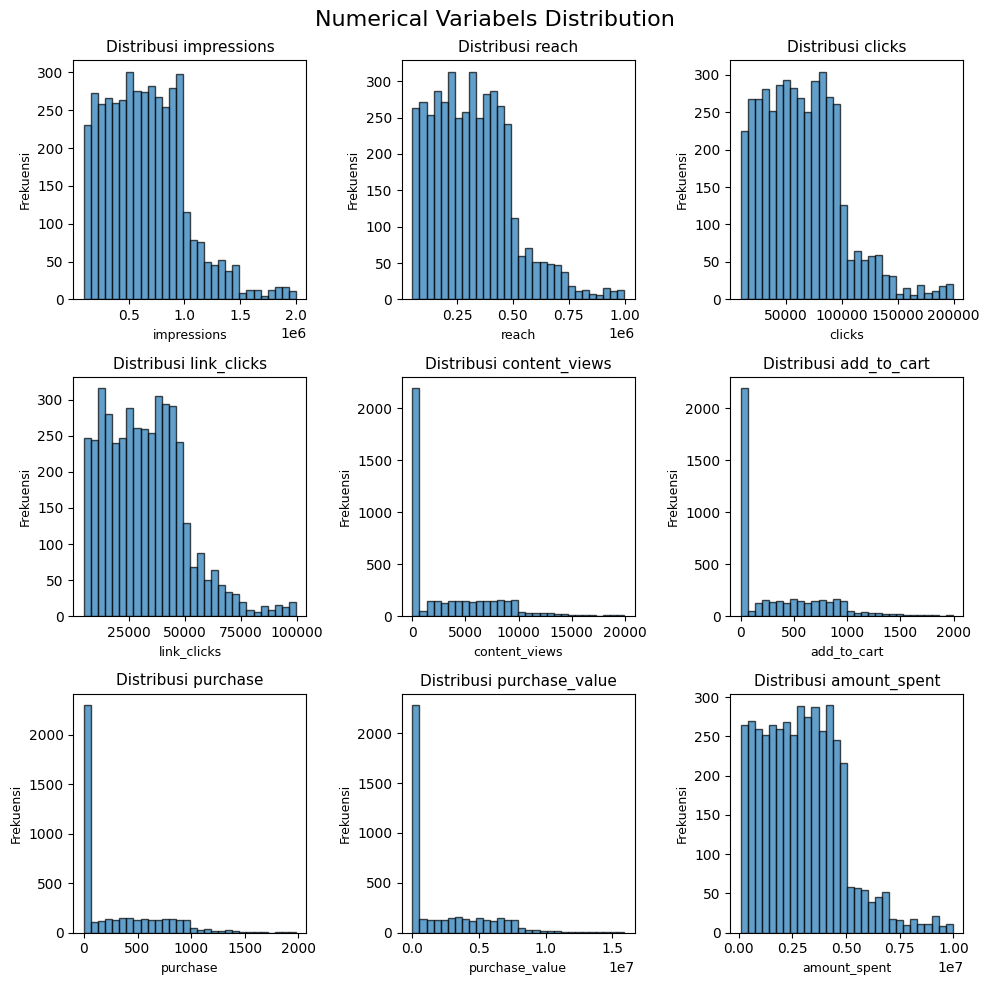

In [13]:
# Numerical Variabels
numeric_cols = ['impressions',
       'reach', 'clicks', 'link_clicks', 'content_views', 'add_to_cart',
       'purchase', 'purchase_value', 'amount_spent']

# Numerical Variabels Distribution
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribusi {col}', fontsize=11)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frekuensi', fontsize=9)
    axes[i].grid(False)  # Menghapus grid

fig.suptitle('Numerical Variabels Distribution', fontsize=16)
plt.tight_layout()
plt.show()

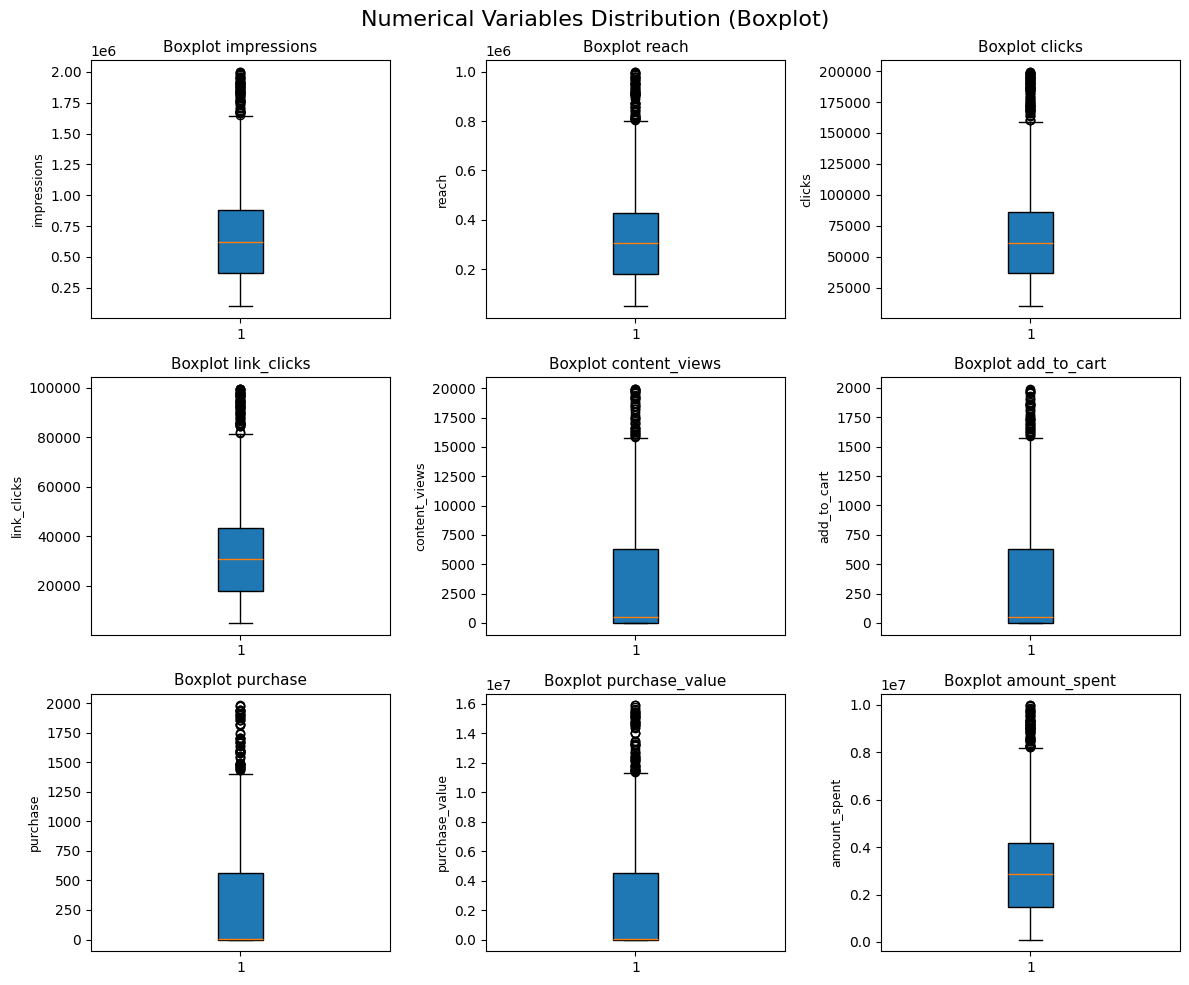

In [14]:
# Numerical Variables

numeric_cols = [
    'impressions',
    'reach',
    'clicks',
    'link_clicks',
    'content_views',
    'add_to_cart',
    'purchase',
    'purchase_value',
    'amount_spent'
]

# Boxplot Visualization

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(
        df[col].dropna(),
        vert=True,
        patch_artist=True
    )
    axes[i].set_title(f'Boxplot {col}', fontsize=11)
    axes[i].set_ylabel(col, fontsize=9)
    axes[i].grid(False)

fig.suptitle('Numerical Variables Distribution (Boxplot)', fontsize=16)
plt.tight_layout()
plt.show()


Berdasarkan hasil analisis eksploratif, seluruh variabel numerik pada dataset menunjukkan distribusi yang tidak berdistribusi normal dengan kecenderungan right-skewed. Hal ini mengindikasikan bahwa sebagian besar nilai terkonsentrasi pada rentang rendah, dengan sejumlah kecil observasi bernilai tinggi.

Selain itu, teridentifikasi adanya outliers pada beberapa variabel numerik. Namun, outliers tersebut masih berada dalam batas yang logis dan relevan secara bisnis, mengingat karakteristik data campaign iklan yang secara alami dapat memiliki performa ekstrem pada campaign tertentu. Oleh karena itu, outliers tidak dihapus, agar informasi penting terkait performa campaign dengan hasil signifikan tetap terjaga dan tidak menghilangkan konteks bisnis yang sebenarnya.

# **DATA ANALYSIS**

## **A. PERFORMANCE METRICS ANALYSIS**

### **1. CTR (Click Trough Rate)**

In [15]:
total_clicks = df['clicks'].sum()
total_impressions = df['impressions'].sum()

ctr = total_clicks / total_impressions
ctr_rounded = round(ctr, 4)

print(f'Click-Through Rate (CTR): {ctr_rounded}')

ctr_percent = round(ctr * 100, 2)

print(f'Click-Through Rate (CTR): {ctr_percent}%')


Click-Through Rate (CTR): 0.0993
Click-Through Rate (CTR): 9.93%


Secara keseluruhan, iklan digital pada dataset ini mencatat CTR sebesar 9,93%, yang mencerminkan tingkat ketertarikan audiens yang cukup tinggi terhadap materi iklan. Nilai ini mengindikasikan bahwa dari setiap 100 impresi, sekitar 9–10 audiens melakukan klik, sehingga dapat disimpulkan bahwa pesan dan visual iklan berhasil menarik perhatian target audiens.

### **2. Performa CTR berdasarkan campaign objective (Traffic vs Sales)**

In [16]:
df['ctr'] = df['clicks'] / df['impressions']

df.head()


,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,ctr
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0,0.101104
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0,0.213882
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0,0.078333
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0,0.012400
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0,0.036011


Meskipun distribusi data bersifat skewed, yang secara statistik umumnya dianalisis menggunakan median, pada analisis ini digunakan pendekatan Weighted CTR. Pendekatan ini dipilih agar hasil analisis dapat mencerminkan pengalaman audiens secara keseluruhan serta menghindari bias yang dapat muncul dari campaign dengan volume impresi kecil namun memiliki CTR ekstrem.

Weighted CTR pada dasarnya merupakan CTR agregat, yang dihitung dengan membandingkan total klik terhadap total impresi, bukan rata-rata CTR per campaign. Dengan demikian, campaign dengan volume impresi yang lebih besar memiliki kontribusi yang proporsional terhadap nilai CTR keseluruhan.

Untuk overall performance, CTR dihitung sebagai total clicks dibagi total impressions pada seluruh data. Sementara itu, untuk analisis per campaign objective, perhitungan dilakukan menggunakan formula yang sama setelah data dikelompokkan berdasarkan masing-masing objective.

In [17]:
# Apply weighted average untuk menghitung CTR berdasarkan campaign_objective
ctr_by_objective = (
    df.groupby('campaign_objective')
      .apply(lambda x: x['clicks'].sum() / x['impressions'].sum()) # menghitung weighted average CTR
      .reset_index(name='ctr')
)

ctr_by_objective['ctr_pct'] = ctr_by_objective['ctr'] * 100
ctr_by_objective

,campaign_objective,ctr,ctr_pct
0,Sales,0.098803,9.880266
1,Traffic,0.099846,9.984596


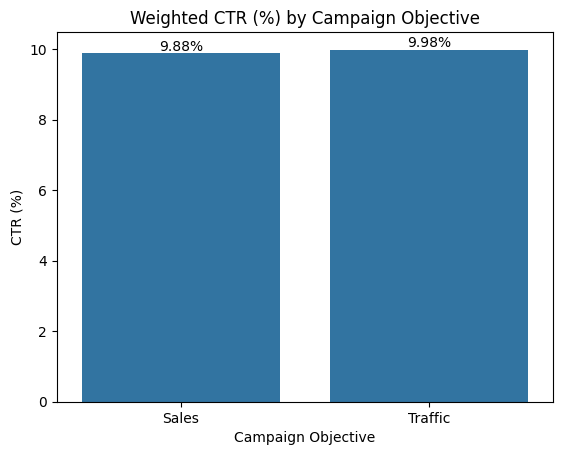

In [18]:
#Visualisasi CTR berdasarkan campaign_objective
ax = sns.barplot(
    data=ctr_by_objective,
    x='campaign_objective',
    y='ctr_pct'
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.ylabel('CTR (%)')
plt.xlabel('Campaign Objective')
plt.title('Weighted CTR (%) by Campaign Objective')
plt.show()


Jika ditinjau berdasarkan campaign objective, baik Sales maupun Traffic menunjukkan performa CTR yang hampir setara, dengan perbedaan yang sangat kecil di antara keduanya. Campaign Traffic mencatat CTR sedikit lebih tinggi, sejalan dengan fokus utamanya dalam mendorong klik. Namun demikian, campaign Sales mampu mempertahankan tingkat CTR yang hampir sama, meskipun berorientasi pada konversi akhir.

Temuan ini menunjukkan bahwa CTR belum menjadi pembeda utama antara kedua objective, sehingga diperlukan analisis lanjutan pada metrik lain untuk mengevaluasi efektivitas campaign secara lebih komprehensif.

### **3. Total Purchase Value/Omzet dari Iklan**

In [19]:
total_omzet = df['purchase_value'].sum()

print(f'Total Omzet: Rp{total_omzet:,.2f}')

Total Omzet: Rp10,450,212,835.40


Total Purchase Value yang dihasilkan dari iklan mencapai Rp10,45 miliar, mengindikasikan bahwa campaign ads tidak hanya berhasil menarik perhatian audiens, tetapi juga mampu mengonversi interaksi tersebut menjadi pendapatan nyata bagi bisnis.

### **4. Return of Advertising Spend keseluruhan**

In [20]:
total_spent = df['amount_spent'].sum()

cpc = total_spent / total_clicks

roas = total_omzet / total_spent

print(f'CPC: Rp{cpc:,.0f}')
print(f'ROAS: {roas:.2f}x')


CPC: Rp46
ROAS: 0.81x


Cost per Click (CPC) tercatat sebesar **Rp46**, yang menunjukkan bahwa biaya rata-rata untuk memperoleh satu klik tergolong rendah. Hal ini menandakan bahwa iklan cukup efektif dalam menghasilkan interaksi awal (klik) dari audiens.

Sementara itu, Return on Advertising Spend (ROAS) sebesar 0,81 menunjukkan bahwa setiap Rp1 biaya iklan menghasilkan Rp0,81 revenue. Nilai ini mengindikasikan bahwa secara keseluruhan kampanye belum mencapai tingkat profitabilitas yang optimal, karena pendapatan yang dihasilkan masih lebih rendah dibandingkan biaya iklan.

## **B. Trend & Time Series Analysis**

### **Tren Performa Iklan dan Pola Musiman**

In [21]:
df['created_date'] = pd.to_datetime(df['created_date'])

df = df.assign(
    ads_date = df['created_date'].dt.date,
    ads_year = df['created_date'].dt.year,
    ads_month = df['created_date'].dt.month,
    ads_day = df['created_date'].dt.day,
    ads_week = df['created_date'].dt.dayofweek
)

df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,ctr,ads_date,ads_year,ads_month,ads_day,ads_week
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0,0.101104,2023-01-01,2023,1,1,6
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0,0.213882,2023-01-01,2023,1,1,6
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0,0.078333,2023-01-01,2023,1,1,6
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0,0.012400,2023-01-01,2023,1,1,6
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0,0.036011,2023-01-01,2023,1,1,6


In [22]:
df['ads_year'].unique()

array([2023], dtype=int32)

In [23]:
df['ads_week'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int32)

Berdasarkan data performa iklan selama periode **Januari–Desember 2023** serta **7 minggu berlangsungnya campaign**, analisis tren dilakukan pada tiga level waktu, yaitu **bulanan, mingguan, dan harian**.

**Analisis bulanan** digunakan sebagai baseline untuk mengidentifikasi tren umum serta indikasi adanya pola musiman (seasonality).**Analisis mingguan** bertujuan untuk menangkap perubahan performa yang lebih detail dan dinamika campaign dalam jangka menengah. Sementara itu, **analisis harian** digunakan secara terbatas untuk mengidentifikasi peak dates serta potensi anomali performa.

Dalam analisis ini, **omzet** digunakan sebagai metrik utama untuk mengamati tren, momentum, dan pola waktu performa iklan. Sementara itu, **ROAS** dianalisis pada level bulanan sebagai indikator efisiensi iklan yang lebih stabil dan relevan dalam mendukung pengambilan keputusan strategis.

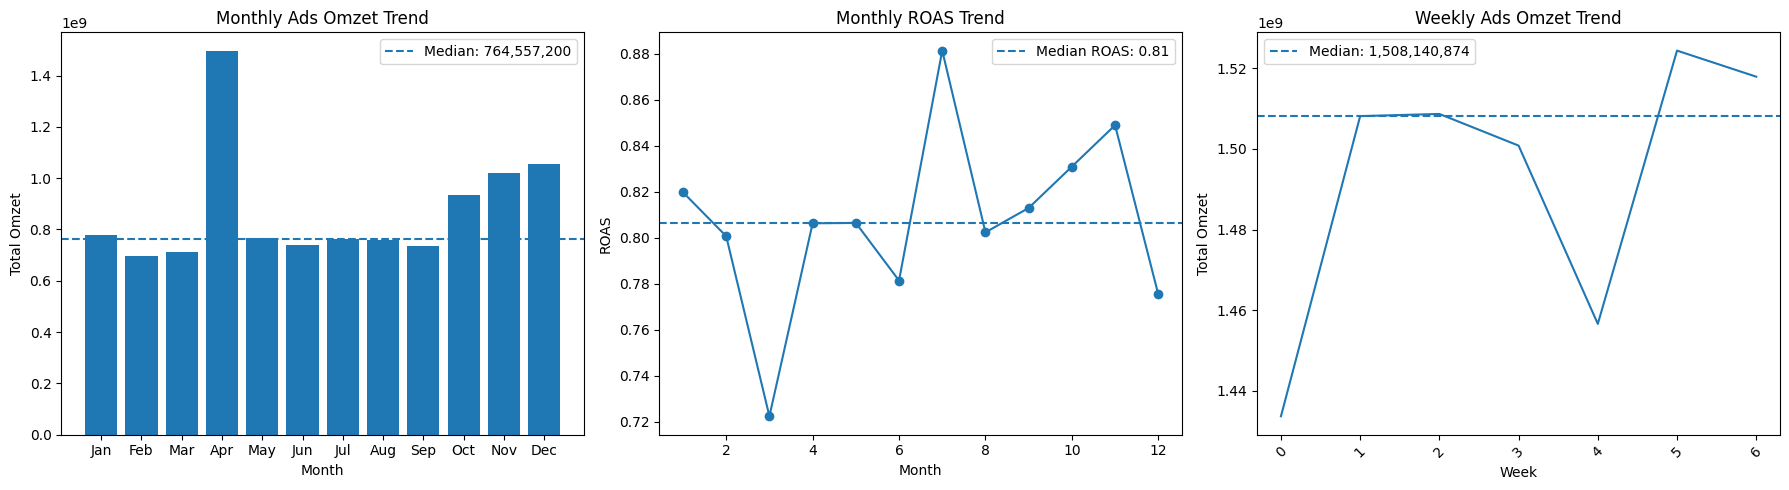

In [24]:
# DAILY ADS PERFORMANCE (PEAK DETECTION)
daily_ads = (
    df.groupby('ads_date')
      .agg(
          purchase_value=('purchase_value', 'sum'),
          amount_spent=('amount_spent', 'sum')
      )
      .reset_index()
)

daily_ads['ROAS'] = daily_ads['purchase_value'] / daily_ads['amount_spent']


# WEEKLY ADS PERFORMANCE (MOMENTUM ANALYSIS)
weekly_ads = (
    df.groupby('ads_week')
      .agg(
          purchase_value=('purchase_value', 'sum'),
          amount_spent=('amount_spent', 'sum')
      )
      .reset_index()
)

weekly_ads['ROAS'] = weekly_ads['purchase_value'] / weekly_ads['amount_spent']


# MONTHLY ADS PERFORMANCE (MAIN TREND & SEASONALITY)
monthly_ads = (
    df.groupby('ads_month')
      .agg(
          purchase_value=('purchase_value', 'sum'),
          amount_spent=('amount_spent', 'sum')
      )
      .reset_index()
)

monthly_ads['ROAS'] = monthly_ads['purchase_value'] / monthly_ads['amount_spent']


# VISUALIZATION (3 SUBPLOTS)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Monthly Omzet (MAIN TREND)
ax1 = axes[0]
ax1.bar(monthly_ads['ads_month'], monthly_ads['purchase_value'])
ax1.axhline(
    monthly_ads['purchase_value'].median(),
    linestyle='--',
    label=f'Median: {monthly_ads["purchase_value"].median():,.0f}'
)
ax1.set_title('Monthly Ads Omzet Trend')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Omzet')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                     'Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.legend()


# 2️⃣ Monthly ROAS (SEASONALITY / EFFICIENCY)
ax2 = axes[1]
ax2.plot(monthly_ads['ads_month'], monthly_ads['ROAS'], marker='o')
ax2.axhline(
    monthly_ads['ROAS'].median(),
    linestyle='--',
    label=f'Median ROAS: {monthly_ads["ROAS"].median():.2f}'
)
ax2.set_title('Monthly ROAS Trend')
ax2.set_xlabel('Month')
ax2.set_ylabel('ROAS')
ax2.legend()


# 3️⃣ Weekly Omzet (MOMENTUM CHECK)
ax3 = axes[2]
ax3.plot(
    weekly_ads['ads_week'].astype(str),
    weekly_ads['purchase_value']
)
ax3.axhline(
    weekly_ads['purchase_value'].median(),
    linestyle='--',
    label=f'Median: {weekly_ads["purchase_value"].median():,.0f}'
)
ax3.set_title('Weekly Ads Omzet Trend')
ax3.set_xlabel('Week')
ax3.set_ylabel('Total Omzet')
ax3.tick_params(axis='x', rotation=45)
ax3.legend()

plt.tight_layout()
plt.show()


Berdasarkan grafik **Monthly Ads Omzet Trend,** terlihat bahwa tren omzet bulanan cenderung stabil, namun terdapat peningkatan yang sangat signifikan pada bulan **April** yang jauh melampaui rata-rata tahunan. Hal ini menunjukkan bahwa April adalah peak month yang berkontribusi paling besar terhadap total omzet iklan karena bertepatan dengan momentum Ramadan dan Hari Raya Idul Fitri (21-22 April 2023). Meskipun omzet mencapai titik tertinggi, ROAS pada periode ini justru berada di bawah rata-rata. Fenomena ini mengindikasikan adanya High Organic Demand during Festive Season, di mana perilaku belanja konsumen lebih didorong oleh kebutuhan hari raya secara alami daripada pengaruh langsung iklan. Rendahnya efisiensi (ROAS) juga dipengaruhi oleh strategi diskon besar-besaran dan pergeseran transaksi ke platform Live Shopping demi mengejar harga promo.

Memasuki kuartal akhir (Oktober–Desember), omzet kembali menunjukkan tren peningkatan yang dipicu oleh Siklus Belanja Akhir Tahun, festival tanggal kembar (10.10 - 12.12), serta promo payday. Hal ini sejalan dengan grafik Weekly Ads Omzet Trend, di mana performa mingguan mengalami fluktuasi namun mencapai puncaknya pada Minggu ke-5. Lonjakan di minggu ke-5 ini mengonfirmasi adanya Payday Effect, di mana daya beli konsumen meningkat drastis saat menerima gaji, sehingga mereka lebih responsif terhadap iklan dan promo taktis.

Secara keseluruhan, analisis ini menunjukkan bahwa performa iklan tidak cukup dievaluasi dari satu metrik saja. Omzet merepresentasikan dampak bisnis yang dipengaruhi pola musiman (seasonality), sedangkan ROAS menunjukkan efisiensi iklan yang puncaknya justru terjadi pada bulan Juli. Juli menunjukkan efektivitas terbaik karena return yang lebih optimal di saat kondisi pasar normal, membuktikan bahwa peningkatan omzet besar tidak selalu berarti iklan lebih efisien.

## **C. Industry & Account Analysis**

### **Avg Omzet per Industry**

In [25]:
df[['client_name', 'industry']] = df['account_name'].str.split(' - ', expand=True)

df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,ctr,ads_date,ads_year,ads_month,ads_day,ads_week,client_name,industry
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0,0.101104,2023-01-01,2023,1,1,6,Client A,Fashion
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0,0.213882,2023-01-01,2023,1,1,6,Client A,Fashion
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0,0.078333,2023-01-01,2023,1,1,6,Client B,Beauty
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0,0.012400,2023-01-01,2023,1,1,6,Client B,Beauty
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0,0.036011,2023-01-01,2023,1,1,6,Client C,Fashion


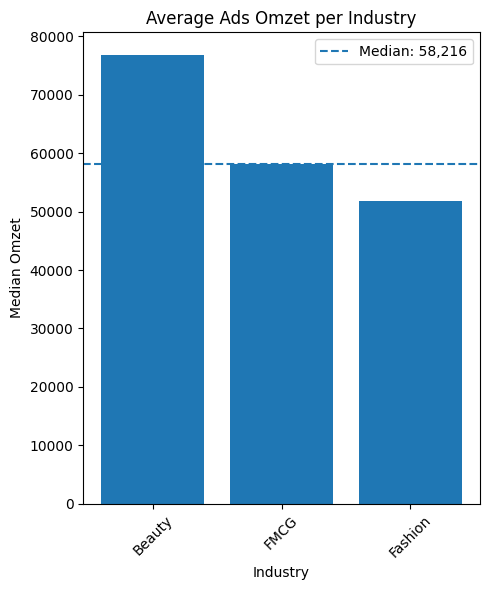

In [26]:
# INDUSTRY AVG OMZET (MEDIAN)

industry_omzet = (
    df.groupby('industry')
      .agg(avg_omzet=('purchase_value', 'median'))
      .sort_values('avg_omzet', ascending=False)
)

plt.figure(figsize=(5, 6))
plt.bar(industry_omzet.index, industry_omzet['avg_omzet'])
plt.axhline(
    industry_omzet['avg_omzet'].median(),
    linestyle='--',
    label=f"Median: {industry_omzet['avg_omzet'].median():,.0f}"
)
plt.title('Average Ads Omzet per Industry')
plt.xlabel('Industry')
plt.ylabel('Median Omzet')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan analisis rata-rata omzet per industri, industri beauty mencatatkan nilai rata-rata omzet tertinggi, yang berada di atas rata-rata keseluruhan industri. Hal ini menunjukkan bahwa industri beauty merupakan kontributor utama terhadap pendapatan Ads.

### **Revenue per Account/Brand**

- Account yang efektif menghasilkan revenue = ROAS tinggi + revenue signifikan
- Dari sisi account, account dengan kombinasi ROAS tinggi dan total omzet besar merupakan akun paling efektif dalam menghasilkan revenue karena mampu mengonversi biaya iklan menjadi penjualan secara optimal.

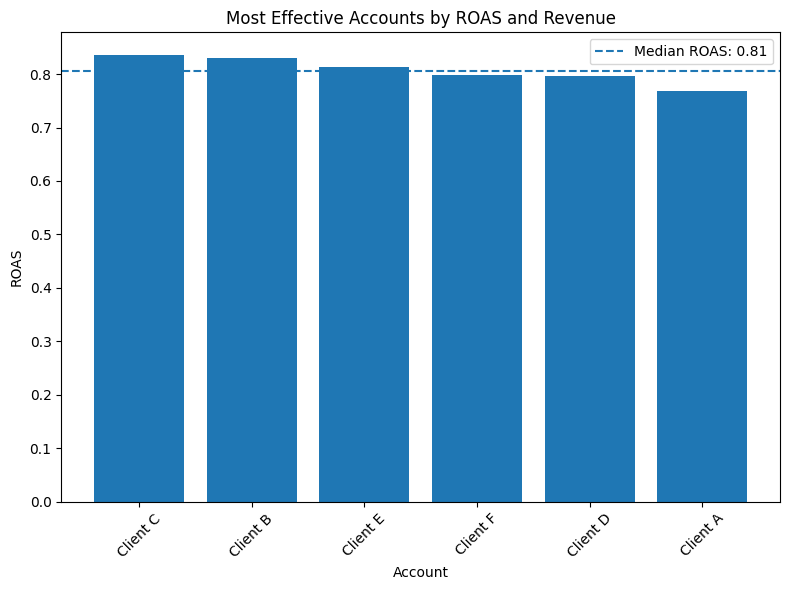

In [27]:
# ACCOUNT PERFORMANCE

account_perf = (
    df.groupby('client_name')
      .agg(
          total_omzet=('purchase_value', 'sum'),
          total_spent=('amount_spent', 'sum')
      )
)

account_perf['ROAS'] = (
    account_perf['total_omzet'] /
    account_perf['total_spent']
)

top_accounts = (
    account_perf
    .sort_values(['ROAS', 'total_omzet'], ascending=False)
)

plt.figure(figsize=(8, 6))
plt.bar(top_accounts.index, top_accounts['ROAS'])
plt.axhline(
    top_accounts['ROAS'].median(),
    linestyle='--',
    label=f"Median ROAS: {top_accounts['ROAS'].median():.2f}"
)
plt.title('Most Effective Accounts by ROAS and Revenue')
plt.xlabel('Account')
plt.ylabel('ROAS')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Klien yang paling efektif dalam menghasilkan revenue adalah Client C, diikuti oleh Client B pada posisi kedua. Kedua klien ini menunjukkan kontribusi rata-rata terhadap revenue yang paling tinggi dibandingkan klien lainnya, sehingga menjadi kontributor utama dalam performa pendapatan Ads.

#### *Apakah terdapat perbedaan median revenue antar industri?*

- H₀ (Null Hypothesis) : Tidak terdapat perbedaan median revenue antar industri

- H₁ (Alternative Hypothesis) : Terdapat perbedaan median revenue pada minimal satu industri

In [28]:
# Kruskal-Wallis Test untuk median REVENUE per Industry
stat_kruskal, pval_kruskal = kruskal(
    df[df['industry'] == 'Beauty']['purchase_value'],
    df[df['industry'] == 'Fashion']['purchase_value'],
    df[df['industry'] == 'Electronics']['purchase_value']
)

# Keputusan Hipotesis
if pval_kruskal < 0.05:
    print(
        "Tolak H0, setidaknya terdapat satu industri "
        "dengan median revenue yang berbeda secara signifikan "
        "dibandingkan industri lainnya."
    )
else:
    print(
        "Gagal menolak H0, tidak terdapat perbedaan median revenue "
        "yang signifikan antar industri."
    )

Gagal menolak H0, tidak terdapat perbedaan median revenue yang signifikan antar industri.


### **ROAS per Industry**

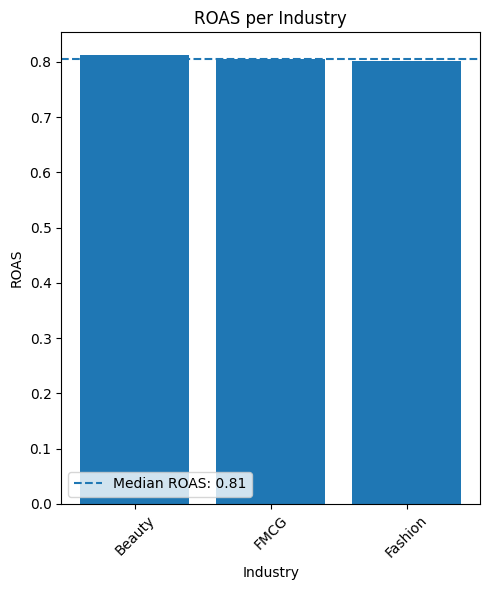

In [29]:
# INDUSTRY ROAS PERFORMANCE

industry_roas = (
    df.groupby('industry')
      .agg(
          total_omzet=('purchase_value', 'sum'),
          total_spent=('amount_spent', 'sum')
      )
)

industry_roas['ROAS'] = (
    industry_roas['total_omzet'] /
    industry_roas['total_spent']
)

industry_roas = industry_roas.sort_values('ROAS', ascending=False)

plt.figure(figsize=(5, 6))
plt.bar(industry_roas.index, industry_roas['ROAS'])
plt.axhline(
    industry_roas['ROAS'].median(),
    linestyle='--',
    label=f"Median ROAS: {industry_roas['ROAS'].median():.2f}"
)
plt.title('ROAS per Industry')
plt.xlabel('Industry')
plt.ylabel('ROAS')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan hasil perhitungan ROAS per industri, **industri Beauty** mencatatkan ROAS tertinggi sebesar **0,81**. Namun, berdasarkan visualisasi yang ditampilkan, perbedaan rata-rata ROAS antar industri tidak terlihat signifikan. Hal ini mengindikasikan bahwa tingkat efisiensi iklan secara umum relatif serupa di seluruh industri yang dianalisis.

#### *Apakah terdapat perbedaan median ROAS antar industri?*

- H₀ (Null Hypothesis) : Tidak terdapat perbedaan median ROAS antar industri

- H₁ (Alternative Hypothesis) : Terdapat perbedaan median ROAS pada minimal satu industri


In [30]:
# Hitung ROAS per baris
df['ROAS'] = df['purchase_value'] / df['amount_spent']

# Kruskal-Wallis Test untuk ROAS per Industry
stat_kruskal, pval_kruskal = kruskal(
    df[df['industry'] == 'Beauty']['ROAS'],
    df[df['industry'] == 'Fashion']['ROAS'],
    df[df['industry'] == 'Electronics']['ROAS']
)

# Keputusan Hipotesis
if pval_kruskal < 0.05:
    print(
        "Tolak H0, setidaknya terdapat satu industri "
        "dengan median ROAS yang berbeda secara signifikan "
        "dibandingkan industri lainnya."
    )
else:
    print(
        "Gagal menolak H0, tidak terdapat perbedaan median ROAS "
        "yang signifikan antar industri."
    )

Gagal menolak H0, tidak terdapat perbedaan median ROAS yang signifikan antar industri.


## ****D. Conclusion and Strategic Action Recommendations****

### **Conclusion**

**1. Performance Metrics Analysis (Efficiency & Conversion)**
-**High Engagement Rate:** CTR keseluruhan mencapai **±9,9%**, angka yang sangat sehat untuk standar industri. Menariknya, CTR antara *Sales* dan *Traffic* seimbang. Ini berarti materi kreatif kuat secara visual, namun masalahnya bukan pada "menarik orang", melainkan pada "biaya untuk mengonversi mereka".
- **Revenue vs. Profitability:** Meskipun omzet total sangat besar, *ROAS rata-rata di bawah 1* menunjukkan bahwa pengeluaran iklan *(ad spend)* masih lebih besar daripada margin keuntungan. Target utama ke depan bukan lagi sekadar menaikkan omzet, melainkan menekan biaya per konversi melalui efisiensi kanal.
- **Conversion Barrier:** Seimbanganya CTR antara *Traffic* dan *Sales* tanpa diiringi ROAS yang tinggi mengindikasikan adanya kebocoran di tahap *Landing Page* atau *Checkout*, sehingga optimasi pasca-klik menjadi krusial.

**2. Trend & Time Series Analysis (Momentum & Seasonality)**
- **The Festive Paradox (April):** April mencatat **Peak Omzet** tertinggi namun dengan **ROAS terendah**. Ini membuktikan adanya *High Organic Demand* (permintaan alami saat Lebaran) di mana iklan konversi yang mahal menjadi tidak efisien. Di sini, iklan seharusnya berfungsi sebagai pengingat *(Awareness)*, bukan pemaksa penjualan.
- **The Golden Window (Juli):** Juli teridentifikasi sebagai bulan dengan **efisiensi (ROAS) tertinggi**. Ini adalah masa tenang di mana biaya iklan lebih murah, menjadikannya waktu terbaik untuk melakukan *A/B Testing* kreatif guna menemukan *"Winning Formula" *sebelum masuk ke musim ramai.
- **Weekly Payday Surge:** Data mingguan menunjukkan pola yang sangat konsisten:** Minggu ke-5** selalu mengalami lonjakan omzet rata-rata **22%**. Ini adalah momentum emas di mana daya beli audiens berada di titik tertinggi dan iklan harus "digas" maksimal *(Scaling)*.

**3. Industry & Account Analysis (Standardization & Leaders)**
- **Profit Drivers (Beauty & FMCG):** Data membuktikan bahwa *Beauty* dan *FMCG* adalah industri paling sehat dengan **ROAS 0.81**, disusul oleh Fashion (0.80). Sektor-sektor inilah yang harus menjadi prioritas utama alokasi budget besar karena risiko pengembalian modalnya paling stabil.
- **Benchmark Excellence (Client C & B):** Akun Client C dan Client B adalah *outliers* positif yang berhasil menyeimbangkan omzet masif dengan ROAS yang tetap stabil. Pola struktur akun mereka harus dijadikan *Internal Template* untuk mengangkat akun-akun lain yang masih memiliki performa di bawah median.
- **Execution Strategy (Retargeting Bridge):** Analisis menunjukkan bahwa perbedaan performa antar akun lebih dipengaruhi oleh strategi teknis daripada jenis industrinya. Penggunaan Retargeting Bridge (menghubungkan trafik murah ke kampanye sales) menjadi kunci utama untuk memperbaiki ROAS di semua kategori.

### **Strategic Actionable Recommendations**

**A. Tactical Budgeting: The "When" Strategy**
- **Payday Surge (Minggu ke-5):** Alokasikan tambahan budget sebesar **22%** pada Minggu ke-5 setiap bulannya.  
Berdasarkan grafik *Weekly Trend*, omzet melonjak rata-rata **22%** di akhir bulan. Ini adalah momentum emas di mana daya beli audiens berada di titik tertinggi.
- **Festive Awareness (Contoh: April):** Di periode *festive* tertentu seperti Idul Fitri, alihkan objektif iklan dari *Sales* ke *Awareness*.  
Sebagaimana yang terjadi di April dimana periode tersebut merupakan *Peak Omzet* yang dipengaruhi oleh Idul Fitri namun memiliki ROAS terendah. Tingginya *High Organic Demand* berarti orang akan beli tanpa perlu dipaksa iklan konversi yang mahal. Fokuslah menjaga *Top of Mind*.
- **The Golden Window (Juli):** Manfaatkan bulan Juli (ROAS tertinggi) untuk melakukan *A/B Testing* kreatif baru karena efisiensi biaya sedang di titik paling optimal.

**B. Industry Focus: The "Where" Strategy**
- **Scale Up Beauty & Fashion:** Fokuskan budget utama pada dua industri ini.  
*Beauty* dan *FMCG* memimpin efisiensi dengan skor ROAS **0.81**. Kedua sektor ini memiliki risiko scaling paling rendah karena rasio pengembalian modalnya terbukti paling stabil dibandingkan industri lainnya.  
- **High-Volume Retargeting for FMCG:** Mengingat *FMCG* memiliki median omzet yang kompetitif, strategi *Retargeting Bridge* harus diimplementasikan secara agresif.
Gunakan *Traffic* untuk menjaring volume audiens besar, lalu lakukan retargeting melalui *Sales* untuk menjaga frekuensi pembelian *(repeat order)* dan menekan *Customer Acquisition Cost (CAC)*.
- **Maximize Fashion Potential**: Meskipun berada di posisi ketiga, *Fashion* (ROAS **0.80**) tetap menjadi prioritas kedua untuk *scaling budget* guna menjaga diversifikasi portofolio akun dengan efisiensi yang masih di atas rata-rata.

**C. Operational Framework**  
**1. Funnel & Campaign Setup**
- **Pemisahan Fungsi Campaign:** Gunakan *Traffic* hanya untuk mengejar CTR & CPC murah. Evaluasi *Sales* murni berdasarkan ROAS & *Conversion Rate*, jangan jadikan CTR sebagai penentu sukses *Sales*.
- **Retargeting Bridge:** Hubungkan funnel dengan melakukan retargeting audiens dari *Traffic* yang sudah melakukan *View Content* atau *Add to Cart* ke dalam *Sales* untuk mengurangi *waste spend*.

**2. Performance-Based Scaling**
- **Atur Budget Berdasarkan Performa:** Gunakan *Base Budget* untuk operasional harian dan aktifkan *Scaling Budget* hanya pada periode performa tinggi (seperti *Payday* Minggu ke-5)
- **Terapkan ROAS Floor:** Tetapkan batas bawah efisiensi (misal: **0.50**). Jika saat menaikkan budget *(scaling)* ROAS turun di bawah angka ini, hentikan *scaling* untuk menyelamatkan profit.
- **Decision Matrix (Decision Logic):**  
*High Revenue – High ROAS (Client C) $\rightarrow$ Scale Up*  
*High Revenue – Low ROAS $\rightarrow$ Optimize Creative*  
*Low Revenue – High ROAS $\rightarrow$ Nurture/Expand Audience*  
*Low Revenue – Low ROAS $\rightarrow$ Pause*

**3. Technical & Quality Control**
- **Account Templating:** Jadikan struktur campaign Client C dan Client B sebagai template standar. Jangan anggap mereka pengecualian; replikasi struktur dan rasio budget mereka ke seluruh akun.
- **Optimasi Pasca-Klik:** Lakukan audit landing page pada *Sales*. Pastikan kecepatan halaman dan konsistensi pesan iklan sesuai agar tidak terjadi *drop-off* di tahap checkout.
- **KPI Monitoring:** Pantau Omzet & ROAS secara beriringan. Lakukan *review* performa secara Mingguan, Hindari pengambilan keputusan harian yang emosional akibat fluktuasi data yang belum stabil.

### **Key Takeaways**

Berdasarkan analisis performa marketing di atas, profitabilitas iklan tidak ditentukan secara acak, melainkan hasil dari sinergi tiga faktor utama: **Momentum, Efisiensi Industri, dan Standarisasi Akun**.

Strategi meningkatkan profit iklan digital terletak pada keberanian untuk "Scaling" (meningkatkan budget) pada saat momentum yang tepat (seperti pada saat payday) dan disiplin dalam menerapkan "ROAS Floor" (batas bawah efisiensi) agar pertumbuhan omzet tetap berjalan selaras dengan keuntungan perusahaan.

Seluruh temuan data ini telah dirumuskan ke dalam 3 Pilar Strategis (Tactical Budgeting, Industry Focus, dan Operational Framework) yang dijelaskan pada bagian **"Strategic Actionable Recommendations"** di atas.